# **Objectives**

1. null and alternative hypothesis
2. hypothesis testing


# **Importing requirements**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

## Null Hypothesis

I claim that I can use mystical abilities to predict the outcome of coin flips.

You don't think I can.

How can we test it?

We do an experiment in which I call 100 coin flips. I get 57 right.

Am I special or not?

### **Determining the Null and Alternative Hypothesis**

**Null:** I'm not special; my true rate of flip prediction is 0.5. 

But even under this hypothesis, I could get 57 out of 100 right. So did I get lucky (by random chance) or am I mystical?

**Alternative:** My true rate of flip prediction is greater than 0.5.

The thing we're measuring from the experiment, or **test statistic**, is the number of correct flip predictions out of 100.

---

If the null hypothesis is correct, the test statistic is binomial distributed with parameters `n = 100` and `p = 0.5`. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.

So if the null hypothesis is correct, how likely is it that I got 57 or more coin flips correct?

Before we check (really, before we do the experiment) we decide what would convince us that I have ESP. The choice of a cutoff at 5% probability is common. That is, if we would only see data as extreme as we've seen less than 5% of the time, we'll say that seems too unlikely and we will conclude that we don't think the null hypothesis is true.

---

We have two outcomes, one with probability (p) and the other with probability (1-p) of happening (remember the axioms of probability?), so we know the [binomial](https://en.wikipedia.org/wiki/Binomial_distribution) [distribution](http://mathworld.wolfram.com/BinomialDistribution.html) is the [right tool for this analysis](https://homepage.divms.uiowa.edu/~mbognar/applets/bin.html).

In the case of the binomial distribution, which is discrete and not too complicated mathematically, we could just work out the probability. But in general we'll rely on some existing functionality. 

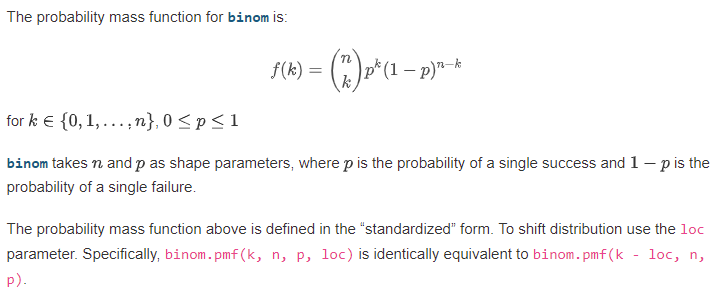

CDF is the cumulative distribution function, and that will be all values up until that first value, so we see 56.

Cumulative Distribution Function and tell us at given a certain number of coin flips, what is the area under the curve to give us the probability of that many coin flips or less.

 So given that we're working with a binomial distribution with N = 100 and P equals 0.5, those are the second and third values, the probability of getting 56 or lower. Now if we're working with a 50/50 flip, that's probably a very large value, the idea being that we take 1- that value to see the probability of getting 57 or greater.

In [11]:
from scipy.stats import binom
binom= binom.cdf(56, 100, 0.5)
print(binom*100)

90.33260477521789


In [10]:
from scipy.stats import binom
prob = 1 - binom.cdf(56, 100, 0.5)
print(prob*100)

print(str(round(prob*100, 1))+"%")

9.667395224782116
9.7%


The probability of getting 57 or more correct is about 9.7%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't have mystical powers.

### Exercise

Find the number of coin flips a person would need to guess correctly for us to believe they're clairvoyant.

---

So we want to see at what point can we say that it's more extreme in terms of the higher ends of getting 95 percent or less. So if we have five percent left on that right end, that's saying that that value or greater only has a five percent chance, whereas that value or less will have a 95 percent chance of happening given that we have 0.5 fair flips coin. So we use 0.95, we pass in 100 because we have 100 coin flips with a fair coin given our null hypothesis, and then we add on so that we know it's that amount or greater. We see that we end up with 59. So the odds given that we have a fair coin of getting 59 or less is 95 percent, 59 or greater would only be five percent

ppf(q, n, p, loc=0)

Percent point function (inverse of cdf — percentiles).

In [12]:
from scipy.stats import binom
print(binom.ppf(0.95,100,0.5))

58.0


Which means, one should get 59 tosses or more to be considered clairvoyant. And we will say the person has predictive power with a confidence level of 95%.

---

## A More Specific Claim

So far so good. What if instead I said, "I'm not perfect, but I can predict coin tosses 60% of the time. Which is still good, which is still valuable."

What do we do in this case? Sure, we can do exactly what we did earlier and when I predict 57 times, we can reject my claim.

But what if I say, "Wait a minute. I said 60 and I got 57, that sounds pretty good to me."

Interpretation:
> "I happened to have a poor guessing day, and that's why my results aren't quite statistically significant!"

What do we say to that? The issue here is that there is no longer a single null hypothesis that we prove or disprove. Instead, **we have two competing hypotheses**:
    * Hypothesis A: There is no predictive power
    * Hypothesis B: There is a 60% predictive power

Each is a normal curve, with one centered at 50% and the other at 60%.

Each one of our curves, when we're working with binomial distribution, will be a normal curve and will be centered at 50 versus 60. If you think about flipping a coin a 100 times, you are most likely to get around 50 correct if you're predicting if you have a 50 percent chance of getting it correct, whereas if you have a 60 percent chance of getting correct, you'll get around 60 correct. So we plot this out, mu being the average. So the first one it's going to be an average of 50. We set the variance equal to 10 and get the square root, which is just going to be our standard deviation. We are going to plot against the x-axis. So we're just going to do np.linspace 1-100, which gives us values between 1-100. How many values do we want between 1-100? We'll have an array of 200 values equally spaced between 1-100, so 1, 1.5, 2, 2.5, and so on. We're then going to plot that x versus a y-variable. That y is going to be stats.norm.pdf. Now, PDF is the probability distribution function. If you ever curious about what a function does, we're just going to run it, and we see that's the probability density function at x. So for each one of our values of x, we are going to output the probability of getting that value. Then for that, we're using the normal distribution with a mean of 50 and a standard deviation of the square root of 10. Then we do the same thing for 60. Then we plot this out. We set our x limit to just between 30 and 80. Now, looking at this curve, we have the values 50 at the middle of the blue curve and 60 at the middle of the orange curve, and we see that the odds of getting around 57 is around where these two intersect. So 57 correct guesses.

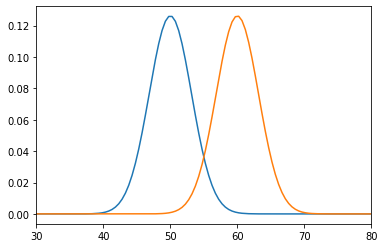

In [13]:
mu = 50
variance = 10
sigma = math.sqrt(variance) #standard deviation
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(30,80)
plt.show()

What now? There just isn't enough data to achieve a confidence of 95%. There are few things we can do.

### 1) Decrease confidence


Since we have a claim at 50 and 60, we can pick the mid-point, which is 55. We can say if I can predict over 55, then I have predictive power. This would mean that we have decreased our confidence level.

In [15]:
print (1 - binom.cdf(55, 100, 0.5))
print (binom.cdf(54, 100, 0.6))
print ((1 - binom.cdf(55, 100, 0.5))*100)
print ((binom.cdf(54, 100, 0.6))*100)

0.1356265120369171
0.13109045261974842
13.562651203691711
13.109045261974842


### 2) Be biased

But it is not neccessary that we bias the two hypotheses equally and pick the midpoint the way we did. The cut-off point can be anywhere. Currently, our error margins are even. The chance that someone has predictive power and we say no is 13% and the chance that someone has no power and we say they do is also 13%. As we change the cutoff, one error goes down and the other goes way up.

For example, if we stuck with the original 95% on a coin being fair:

In [16]:
binom.ppf(0.95, 100, 0.5) #this is the inverse of the cdf functions above

58.0

Then our cutff is 58. Our two errors will be:

In [17]:
print (1-binom.cdf(58, 100, 0.5))
print (binom.cdf(58, 100, 0.6))

0.04431304005703374
0.3774673238778277


5% chance someone has no power and we say they do. But a 38% chance someone has predictive power and we say no. Which depending on the problem might be exactly what we want. These two types of errors are called Type I and Type II. And we have the choice of biasing against one or the other. 

### 3) Increase sample size

The best scenario though is to increase the sample size. Imagine what happens we did 1000 tosses instead of 100.

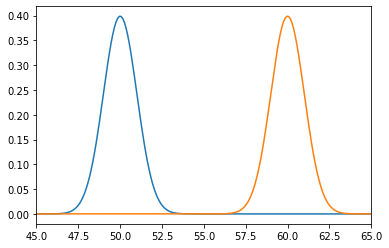

In [18]:
mu = 50
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(45,65)
plt.show()

With a larger sample size, there will be much less of an overlap. So the chances of trying to trade-off between one and the other isn't as big of an issue. We can print for each of these what the cut-off would be given on one side, we have a fair coin the value higher than. What value do we need higher than in order to say that there is predictive power versus on the other end if we're using 60 percent, what value is lower then that we need to reject that hypothesis of 60 percent. So on one end there was 526. So you can predict 526 or greater I would say that you have predictive power whereas if you have 574 or less, I would reject the null that you have 60 percent predictive power.

In [19]:
print (binom.ppf(0.95,1000,0.5))
print (binom.ppf(0.05,1000,0.6))

526.0
574.0
